<a href="https://colab.research.google.com/github/vvrebellion/20191204_VITTORIA_ML/blob/main/Copy_of_03_minibatch_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [ ]:

#from google.colab import drive
#drive.mount('/content/gdrive')

In [2]:
#Q1. Execute the following statement. What is displayed? What does it mean?
!pwd

/content


A1: It displays /content , which is the path of the working directory.  pwd means  Print Working Directory, and in our case /content is the working directory

In [3]:
#Q2: Execute the following statement. What happens?  Examine the left column of your colab page to see what happens.
!git clone https://github.com/fastai/course-v3.git

Cloning into 'course-v3'...
remote: Enumerating objects: 5890, done.
remote: Total 5890 (delta 0), reused 0 (delta 0), pack-reused 5890
Receiving objects: 100% (5890/5890), 263.03 MiB | 33.24 MiB/s, done.
Resolving deltas: 100% (3249/3249), done.


A2: this statement clones the contents the course-v3 repository to our working directory. We are working on a remote machine which does not have the data sets and previously exported modules and packages that were developed during the course. So when we start a notebook, we have to clone the files from course-V3 repository, otherwise our code will not work!

In [ ]:
#export
#Q3a: Execute the following statement. Read the error message. Explain what it means. 

from exp.nb_02 import *


A3a: The message says "ModuleNotFoundError: No module named 'exp'" which means the computer could not find the path of the module we are trying to import

In [ ]:
#Q3b. You can solve the problem by executing the following statement before the above statement. 
# Explain why the following statements can solve this "module not found" problem. 

In [4]:
import sys
sys.path.append('/content/course-v3/nbs/dl2')
sys.path

['',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/course-v3/nbs/dl2']

A3b: We used sys.path.append()to include a new file path, /content/course-v3/nbs/dl2,  that contains modules that we want to import (a module is a python file).  

In [18]:
import torch.nn.functional as F

## Initial setup

### Data

[Jump_to lesson 9 video](https://course.fast.ai/videos/?lesson=9&t=1786)

In [6]:
from IPython.display import Image
from six.moves import urllib

opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

def get_data():
    import os
    import torchvision.datasets as datasets
    root = '../data'
    if not os.path.exists(root):
        os.mkdir(root)

    train_set = datasets.MNIST(root=root, train=True, download=True)
    test_set = datasets.MNIST(root=root, train=False, download=True) #load validation set
    x_train, x_valid = train_set.data.split([50000, 10000])
    y_train, y_valid = train_set.targets.split([50000, 10000])
    return (x_train.view(50000, -1) / 256.0), y_train.float(), (x_valid.view(10000, -1))/ 256.0, y_valid.float()



In [ ]:
#mpl.rcParams['image.cmap'] = 'gray'

In [7]:
#Q4: when you execute the following statement, where is the downloaded data stored? Examine the left column of your colab page.
x_train,y_train,x_valid,y_valid = get_data()

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw




Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


A4: The data is stored in folder course-v3/nbs/data folder.


In [8]:
#Q5a: Execute the following statement. What does the number displayed mean?
len(x_train)

50000

A5a: len(x_train) displays the number of inputs X of our training data set.
In this case, our data are binary images of digits from 0 to 9. 
The length of x_train is 50,000, which means we have 50,000 input images. 
This makes x_train a matrix with 50,000 rows, each row representing a binary image of digits from 0 to 9. Each image is of 28 by 28 dimension, making the number of columns in the matrix equal to 784.

In [9]:
#Q5b: Execute the following statement. What do the numbers displayed refer to?
x_train[0]

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 

5b: it displays the first element of xtrain, one of the data set images in matrix form. the elements in this matrix represent the pixels of the picture, eg. 0 represents the black color.


In [11]:
#Q5c: Execute the following statement. What do the numbers displayed refer to?
y_train[0]

tensor(5.)

5c: y_train contains the outputs, the labels of the pictures, in this case a digit from 0 to 9 for each of the 50,000 inside the x_train.
this statement displays the first element inside y_train, which is the label of digit 5

In [12]:
#Q5d. Execute the following statement. What does the number displayed refer to? 
x_train[0].shape

torch.Size([784])

5d: This number is the amount of colums inside the first row, or first element, of x_train. It is 784, also 28*28 because that is the dimension of the picture (total number of pixels of the unrolled image). If we plot the image we can the see the actual picture of a number.

In [13]:
#Q5e. Execute the following statement. What do the numbers displayed refer to?
x_train.shape

torch.Size([50000, 784])

5e: these numbers tell us that x_train is matrix with 50,000 rows, (each row representing a binary image of digits from 0 to 9), and 784 columns (Each image is of 28 by 28 dimension, making the number of columns in the matrix equal to 784)

In [14]:
#Q5f. Execute the following statement. What do the numbers displayed refer to?
y_train.shape

torch.Size([50000])

A5f: this shows us that there are 50,000 elements inside the y_train, each one is a label (digit 0-9) corresponding to the images in x_train

In [15]:
#Q6: Display the values of n,m, c, and nh. What are they? For what are they used in the following code? 
n,m = x_train.shape
c = y_train.max()+1
nh = 50

A6:we are storing the numbers of n = rows, m = colums 
since they are equal to x_train, we will have n =50000 and m = 784
c = classes, there are 10 different classes found in y_train: digits 0 to 9
nh = number of hidden units, in this model nh = 50

In [19]:
from torch import nn

In [21]:
#The following defines Model class, which will be used to create a neural net.
#Q7a: nn.Module is the parent class of class Model. Why do you want to make Model a child class to its parent nn.Module, rather than making Model stand on its own?
#Q7b. See the definition of self.layers field. It contains nn.Linear(n_in,nh). What is the difference between nn.Linear class nn.Linear(n_in,nh)? 
#Q7c. Would you think that the weight and bias parameters of the two linear layers are initialized when object nn.Linear(n_in,nh) is constructed? If so, guess why.

class Model(nn.Module):
    def __init__(self, n_in, nh, n_out):
        super().__init__()
        self.layers = [nn.Linear(n_in,nh), nn.ReLU(), nn.Linear(nh,n_out)]
        
    def __call__(self, x):
        for l in self.layers: x = l(x)
        return x

* 7.a Module is a class,which is used as a constructor of an object, which will belong to this class.We want to use nn.Module, which has useful methods like parameters() , call() and others which will help us build our neural net. With nn.Module we can also assign submoduls as atributes, and they will nest in a tree structure.

* 7.b nn. Linear(n,m) is a module that creates single layer to forward the network with n inputs and m output, nn.Linear(n_in,nh) will do the same but with the inputs from previous layer and connect them to the hidden layers

* 7.c I think so, because there is a nn.ReLU inside self.layers and Relu is an activation function

In [22]:
#Q8. When the following statement is executed, what happens? Explain by referring to a method in class Model.
model = Model(m, nh, 10)

A8: we create our model which is going to perform a forward pass of our neural network and give us 10 outputs

In [23]:
#Q9a. When the following statement is executed, what happens? Explain by referring to a method in class Model. 
#Q9b. Draw a diagram or a graph by using arrows and boxes, which shows what computation is performed when model(x_train) is executed.
pred = model(x_train)

A9a: the function call is going to be executed, We are multiplying the gradients of the previous layer which is the output layer for the ReLU
A9b:


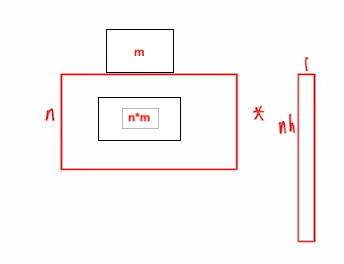

In [24]:
#Q10: Execute the following statement. What do the 10 displayed numbers refer to?
pred[0]

tensor([-0.1739,  0.1893,  0.0258,  0.1667,  0.0434,  0.1879,  0.0233, -0.0133,
         0.1355,  0.0378], grad_fn=<SelectBackward>)

A10: these are the probabilities of the input being each one of the possible outputs (digits from 0 to 9)

In [25]:
#Q11. Execute the following statement. Is the resulting value near to 1? If not, what does it imply?
pred[0].sum()

tensor(0.6226, grad_fn=<SumBackward0>)

A11: it is not close to 1 which means there are some negative numbers in the mix. the value should be 1 or close to 1, as this is the total chance of probability of all numbers combined.

### Softmax function

First, we will need to compute the softmax of our activations. This is defined by:

$$\hbox{softmax(x)}_{i} = \frac{e^{x_{i}}}{e^{x_{0}} + e^{x_{1}} + \cdots + e^{x_{n-1}}}$$

or more concisely:

$$\hbox{softmax(x)}_{i} = \frac{e^{x_{i}}}{\sum_{0 \leq j \leq n-1} e^{x_{j}}}$$ 

In practice, we will need the log of the softmax when we calculate the loss.

In [26]:
def softmax(x): return (x.exp()/(x.exp().sum(-1,keepdim=True)))

In [27]:
sm_pred = softmax(pred)


In [28]:
#Q12. Execute the following statement. What do the 10 displayed numbers refer to?
sm_pred[0]

tensor([0.0785, 0.1129, 0.0959, 0.1104, 0.0976, 0.1128, 0.0956, 0.0922, 0.1070,
        0.0970], grad_fn=<SelectBackward>)

A12: these are the probability of  predictions after using the cross entorpy loss function, they are all positive now.

In [29]:
#Q13. Execute the following statement. What does the displayed numbers mean?
sm_pred[0].sum()

tensor(1., grad_fn=<SumBackward0>)

A13: as expected, the sum of all the prediction probabilities is 1, as it should be. This happened because now all numbers are positive.

## Log softmax

In [30]:
def log_softmax(x): return (x.exp()/(x.exp().sum(-1,keepdim=True))).log()

In [31]:
log_sm_pred = log_softmax(pred)

In [32]:
log_sm_pred[0]

tensor([-2.5443, -2.1811, -2.3445, -2.2036, -2.3269, -2.1825, -2.3471, -2.3836,
        -2.2349, -2.3326], grad_fn=<SelectBackward>)



## Cross Entropy Loss Function.
 Read the following paragraph to understand what the cross entroy loss functioni is. 

The difference between  two probabilities: 
 https://datascience.stackexchange.com/questions/20296/cross-entropy-loss-explanation

The cross entropy formula takes in two distributions,  $p(x^{(s)})$, the true distribution (defined by the label data), and $\hat{p}(x^{(s)})$, the estimated distribution (predicted by the neural net), defined over the discrete variable $x^{(s)}$  and is given by

$H(p,\hat{p})=−\sum_{s \in B} p(x^{(s)}) \cdot log(\hat{p}(x^{(s)}))$


In general, $ p(x^{(s)}) = [ p_{1} (x^{(s)}), ..., p_{n}(x^{(s)})]$ is a probability distribution over a set of categories. 
But since our $ p(x^{(s)})$ are 1-hot encoded, that is, in the form of  $ p(x^{(s)}) =[0,0,..,0,1,0..]$, where the probability of only one category is one and those of the other categories are all zero, this can be rewritten as

 \begin{equation}
 H(p,\hat{p})= -\sum_{s \in B} [ 0*\log(\hat{p}_{1} (x^{(s)}))  
 + 1*\log(\hat{p}_{i} (x^{(s)}) ) +..+
 0* \log( \hat{p}_{n} (x^{(s)}) ) ] \\ 
  = -\sum_{s \in B} \log(\hat{p}_{i(s)} ) (x^{(s)}) ) 
  \tag{crossEntroyEq}
 \end{equation}
 
 Te softmax function plays the role of the probability distribution $\hat{p}_{1} (x^{(s)})$.

  Here $i(s)$ is the index of the one-hot  probability distribution $p(x^{(s)})$ where the probability is one. 
 
 

# integer array indexing 

In [33]:
#Q14a.  Execute the following statement. What is the role of list [0,1,2] in the statement?  What do the displayed numbers refer to? 
log_sm_pred[ [0,1,2]]

tensor([[-2.5443, -2.1811, -2.3445, -2.2036, -2.3269, -2.1825, -2.3471, -2.3836,
         -2.2349, -2.3326],
        [-2.4419, -2.2481, -2.3383, -2.2405, -2.2559, -2.2262, -2.3545, -2.3125,
         -2.2436, -2.3885],
        [-2.4111, -2.2208, -2.3371, -2.2303, -2.1950, -2.2108, -2.4270, -2.3972,
         -2.2214, -2.4197]], grad_fn=<IndexBackward>)

A14a: for integer array indexing we pass a list to each dimenson. We have 2 dimension, so we pass two lists. The first is the list of all the row indexes we want. In these rows we can see the prediction probabilities.

In [34]:
#Q14b.  Execute the following statement. What is the role of list [2,4,6] in the statement?  What do the displayed numbers mean? Explain compare the result of Q15b and the result of this statement.
log_sm_pred[[0,1,2], [2,4,6]]

tensor([-2.3445, -2.2559, -2.4270], grad_fn=<IndexBackward>)

A14b:  The first is the list of all the row indexes we want, the second are the columns. It tells us what are the probabilities associated with 2,4 and 6. here we are trying to see the probability of the prediction for the first three values being correct

[Jump_to lesson 9 video](https://course.fast.ai/videos/?lesson=9&t=2081)

In [35]:
range(y_train.long().shape[0])

range(0, 50000)

In [36]:
selectOneHot = log_sm_pred[ range(y_train.long().shape[0]), y_train.long() ]

In [37]:
selectOneHot.shape

torch.Size([50000])

In [ ]:
#Q15.  What does selectOneHot refer to?

A15: it referst to y.train

In [38]:
def nll(input, target):
   
   return -input[range(target.shape[0]), target].mean()

In [39]:
y_train.long().shape[0]

50000

In [40]:
#Q16. Read nill function and explain how this function computes the result. You need to refer to {CrossEntropyLoss}.
loss = nll(log_sm_pred, y_train.long())

A16: the function finds the max then it subtracts and does the summation of logs


In [41]:
loss

tensor(2.2998, grad_fn=<NegBackward>)

In [54]:
#Q16. Compare function nll() and the formula CrossEntropyEq. Explain that function nll() computes the cross entropy function between
# predicted probability distrubution of the input images and the ground truth (labeled) probability distribution of the input images. 

A16: Instead of taking all probabilities and multiply with the target values, we only take the probability of the correct answer. We can do this because incorrect target values will be zero, so the result will be the same but we save some computation power.

## Basic training loop

Basically the training loop repeats over the following steps:
- get the output of the model on a batch of inputs
- compare the output to the labels we have and compute a loss
- calculate the gradients of the loss with respect to every parameter of the model
- update said parameters with those gradients to make them a little bit better

[Jump_to lesson 9 video](https://course.fast.ai/videos/?lesson=9&t=2542)

In [42]:
loss_func = F.cross_entropy # This built-in Pytorch function  combines log_softmax and nll in a single function.
# In the following code, we will use this function, not the function nll defined above.

In [43]:
#export
def accuracy(out, yb): return (torch.argmax(out, dim=1)==yb).float().mean()

In [44]:
bs=1000                  # batch size

xb = x_train[0:bs]     # a mini-batch from x
preds = model(xb)      # predictions
preds[0], preds.shape

#Q17. What does preds[0] refer to?

(tensor([-0.1739,  0.1893,  0.0258,  0.1667,  0.0434,  0.1879,  0.0233, -0.0133,
          0.1355,  0.0378], grad_fn=<SelectBackward>), torch.Size([1000, 10]))

A17: these are the predictions before we train our model

In [45]:
yb = y_train[0:bs]
loss = loss_func(preds, yb.long())
loss
#Q18. What does the value of loss refer to?

tensor(2.2974, grad_fn=<NllLossBackward>)

A18: loss is the difference between the actual output and the prediction made by the model  

In [50]:
import torch
import torchvision

In [51]:
accuracy(preds, yb)
#Q19. What does  the value of the above statement refer to? Examine the value. Is it supposed to be equal to one approximately?
# If it is not at the current moment, what is the reason for it?

tensor(0.1490)

A19: Yes, it is supposed to be 1 (maximum accuracy). But this is the accuracy for only one single mini batch from the training set, so it doesn't mean to much. But we can still say that our model is learning something.

# The mechanism for training the network: 

(1) computing the graidents of Loss with respect to tensors at each layer, (2) backpropgation: applying the chain rule to compute the gradient vector of the parameters, (3) updating the parameters.

https://github.com/pytorch/pytorch/blob/35bd2b3c8b64d594d85fc740e94c30aa67892a34/torch/tensor.py

https://github.com/pytorch/pytorch/blob/35bd2b3c8b64d594d85fc740e94c30aa67892a34/torch/tensor.py

https://stackoverflow.com/questions/57248777/backward-function-in-pytorch


In [52]:
lr = 0.5   # learning rate
epochs = 2 # how many epochs to train for

In [55]:
import pdb


In [56]:
#Q20. What does the number  (n-1)//bs + 1 refer to? 
#A20: n is the number of rows diveded by the batch size (to do batch to time)

for epoch in range(epochs):
    for i in range((n-1)//bs + 1): # for each batch in the current epoch
#       pdb.set_trace()
        start_i = i*bs
        end_i = start_i+bs

        xb = x_train[start_i:end_i]
        yb = y_train[start_i:end_i]


        ybHat = model(xb)
        #h = ybHat.register_hook( lambda grad: print (grad) )

        loss = loss_func( ybHat, yb.long())        

        #ybHat.grad
        loss.backward() # When you call loss.backward(), all it does is compute gradient of loss 
                        # w.r.t all the parameters in loss that have requires_grad = True and store them in parameter.grad attribute for every parameter

        #ybHat.grad                
        #The following performs what Pytorch function optimizer.step() does:
        # It updates all the weight and bias parameters based on the gradients of loss with respect to the weight and bias parameter 
        with torch.no_grad():
            for l in model.layers:
                if hasattr(l, 'weight'):
                    l.weight -= l.weight.grad * lr
                    l.bias   -= l.bias.grad   * lr

                    #
                    # loss.backward() computes the gradient of loss w.r.t. graph LEAVES.
                    #  This function accumulates gradients in the leaves - you might need to zero
                    # we don't care about gradients from the previous batch.
                    # Not zeroing grads would lead to gradient accumulation across batches
                    l.weight.grad.zero_()
                    l.bias.grad.zero_()

       #Q21:  print the loss and the accuracy after training the net using the validation dataset.
       #      Explain how the loss and accuracy change as each batch is used  for training the network model.
       #      Try to convey detailed and specific information about the progress of training the neural net.
       #      Observe the printed data carefully
       #A21:we can notice the relation of 
        #accuracy vs number of batch trainings. The taccuracy  values show a 
        #steady improvement as the number of batches goes up. 
    
       #Q22. Explain why you would use validation dataset to check the progress of learning of your network.
        #A22:The model is going to train with the Train set (80% of the 
#data), while the validation set (20% of data) is not going to be shown to the model. After the 
#training is done we can use the validation set data to know if we're overfitting, that is, to know 
#whether our model can correctly classify only the images it used to train or if it can also classify 
#images it has never seen before.    
        
        yHatValid = model(x_valid)
        lossValid = loss_func( yHatValid, y_valid.long() )        

        
        print('epoch={0}, batch ={1}:'.format(epoch, i) )  
        print('  lossValid=', lossValid )
        print('  accuracyValid = ', accuracy( yHatValid, y_valid) )

    #Q23. Afer each epoch, print the loss and the accuracy of the network by using the training dataset. 
    #     Explain the result. Be attentive to the result. 
      

    yHatTrain = model(x_train)
    lossTrain = loss_func( yHatTrain, y_train.long() )        

    print('*******************************************************')    
    print('epoch={0}:', epoch )  
    print('  lossTrain=', lossTrain)
    print('  accuracyTrain = ', accuracy( yHatTrain, y_train) )

    #Q24. Afer each epoch, print the loss and the accuracy of the network by using the validatio  dataset. 
    #     Explain the result. Be attentive to the result.   

    yHatValid = model(x_valid)
    lossValid = loss_func( yHatValid, y_valid.long() )        

    print('*******************************************************')    
    print('epoch={0}:', epoch )  
    print('  lossValid ', lossValid)
    print('  accuracyValid = ', accuracy( yHatValid, y_valid) )
        

TypeError: ignored

In [ ]:
loss_func(model(xb), yb.long()), accuracy(model(xb), yb)

(tensor(0.0979, grad_fn=<NllLossBackward>), tensor(0.9375))

## Using parameters and optim

### Parameters

Use `nn.Module.__setattr__` and move relu to functional:

[Jump_to lesson 9 video](https://course.fast.ai/videos/?lesson=9&t=2818)

In [ ]:
class Model(nn.Module):
    def __init__(self, n_in, nh, n_out):
        super().__init__()
        self.l1 = nn.Linear(n_in,nh)
        self.l2 = nn.Linear(nh,n_out)
        
    def __call__(self, x): return self.l2(F.relu(self.l1(x)))

In [ ]:
model = Model(m, nh, 10)

In [ ]:
for name,l in model.named_children(): print(f"{name}: {l}")

l1: Linear(in_features=784, out_features=50, bias=True)
l2: Linear(in_features=50, out_features=10, bias=True)


In [ ]:
model

Model(
  (l1): Linear(in_features=784, out_features=50, bias=True)
  (l2): Linear(in_features=50, out_features=10, bias=True)
)

In [ ]:
model.l1

Linear(in_features=784, out_features=50, bias=True)

In [ ]:
def fit():
    for epoch in range(epochs):
        for i in range((n-1)//bs + 1):
            start_i = i*bs
            end_i = start_i+bs
            xb = x_train[start_i:end_i]
            yb = y_train[start_i:end_i]
            loss = loss_func(model(xb), yb.long())

            loss.backward()
            with torch.no_grad():
                for p in model.parameters(): p -= p.grad * lr
                model.zero_grad()

In [ ]:
fit()
loss_func(model(xb), yb.long()), accuracy(model(xb), yb)

(tensor(0.0097, grad_fn=<NllLossBackward>), tensor(1.))

Behind the scenes, PyTorch overrides the `__setattr__` function in `nn.Module` so that the submodules you define are properly registered as parameters of the model.

In [ ]:
class DummyModule():
    def __init__(self, n_in, nh, n_out):
        self._modules = {}
        self.l1 = nn.Linear(n_in,nh)
        self.l2 = nn.Linear(nh,n_out)
        
    def __setattr__(self,k,v):
        if not k.startswith("_"): self._modules[k] = v
        super().__setattr__(k,v)
        
    def __repr__(self): return f'{self._modules}'
    
    def parameters(self):
        for l in self._modules.values():
            for p in l.parameters(): yield p

In [ ]:
mdl = DummyModule(m,nh,10)
mdl

{'l1': Linear(in_features=784, out_features=50, bias=True), 'l2': Linear(in_features=50, out_features=10, bias=True)}

In [ ]:
[o.shape for o in mdl.parameters()]

[torch.Size([50, 784]),
 torch.Size([50]),
 torch.Size([10, 50]),
 torch.Size([10])]

### Registering modules

We can use the original `layers` approach, but we have to register the modules.

[Jump_to lesson 9 video](https://course.fast.ai/videos/?lesson=9&t=2997)

In [ ]:
layers = [nn.Linear(m,nh), nn.ReLU(), nn.Linear(nh,10)]

In [ ]:
class Model(nn.Module):
    def __init__(self, layers):
        super().__init__()
        self.layers = layers
        for i,l in enumerate(self.layers): self.add_module(f'layer_{i}', l)
        
    def __call__(self, x):
        for l in self.layers: x = l(x)
        return x

In [ ]:
model = Model(layers)

In [ ]:
model

Model(
  (layer_0): Linear(in_features=784, out_features=50, bias=True)
  (layer_1): ReLU()
  (layer_2): Linear(in_features=50, out_features=10, bias=True)
)

### nn.ModuleList

`nn.ModuleList` does this for us.

[Jump_to lesson 9 video](https://course.fast.ai/videos/?lesson=9&t=3173)

In [ ]:
class SequentialModel(nn.Module):
    def __init__(self, layers):
        super().__init__()
        self.layers = nn.ModuleList(layers)
        
    def __call__(self, x):
        for l in self.layers: x = l(x)
        return x

In [ ]:
model = SequentialModel(layers)

In [ ]:
model

SequentialModel(
  (layers): ModuleList(
    (0): Linear(in_features=784, out_features=50, bias=True)
    (1): ReLU()
    (2): Linear(in_features=50, out_features=10, bias=True)
  )
)

In [ ]:
fit()
loss_func(model(xb), yb.long()), accuracy(model(xb), yb)

(tensor(0.0318, grad_fn=<NllLossBackward>), tensor(1.))

### nn.Sequential

`nn.Sequential` is a convenient class which does the same as the above:

[Jump_to lesson 9 video](https://course.fast.ai/videos/?lesson=9&t=3199)

In [ ]:
model = nn.Sequential(nn.Linear(m,nh), nn.ReLU(), nn.Linear(nh,10))

In [ ]:
fit()
loss_func(model(xb), yb.long()), accuracy(model(xb), yb)

(tensor(0.0522, grad_fn=<NllLossBackward>), tensor(1.))

In [ ]:
nn.Sequential??

In [ ]:
model

Sequential(
  (0): Linear(in_features=784, out_features=50, bias=True)
  (1): ReLU()
  (2): Linear(in_features=50, out_features=10, bias=True)
)

### optim

Let's replace our previous manually coded optimization step:

```python
with torch.no_grad():
    for p in model.parameters(): p -= p.grad * lr
    model.zero_grad()
```

and instead use just:

```python
opt.step()
opt.zero_grad()
```

[Jump_to lesson 9 video](https://course.fast.ai/videos/?lesson=9&t=3278)

In [ ]:
class Optimizer():
    def __init__(self, params, lr=0.5): self.params,self.lr=list(params),lr
        
    def step(self):
        with torch.no_grad():
            for p in self.params: p -= p.grad * lr

    def zero_grad(self):
        for p in self.params: p.grad.data.zero_()

In [ ]:
model = nn.Sequential(nn.Linear(m,nh), nn.ReLU(), nn.Linear(nh,10))

In [ ]:
opt = Optimizer(model.parameters())

In [ ]:
for epoch in range(epochs):
    for i in range((n-1)//bs + 1):
        start_i = i*bs
        end_i = start_i+bs
        xb = x_train[start_i:end_i]
        yb = y_train[start_i:end_i]
        pred = model(xb)
        loss = loss_func(pred, yb.long())

        loss.backward()
        opt.step()
        opt.zero_grad()

In [ ]:
loss,acc = loss_func(model(xb), yb.long()), accuracy(model(xb), yb)
loss,acc

(tensor(0.0091, grad_fn=<NllLossBackward>), tensor(1.))

PyTorch already provides this exact functionality in `optim.SGD` (it also handles stuff like momentum, which we'll look at later - except we'll be doing it in a more flexible way!)

In [ ]:
#export
from torch import optim

In [ ]:
optim.SGD.step??

In [ ]:
def get_model():
    model = nn.Sequential(nn.Linear(m,nh), nn.ReLU(), nn.Linear(nh,10))
    return model, optim.SGD(model.parameters(), lr=lr)

In [ ]:
model,opt = get_model()
loss_func(model(xb), yb.long())

tensor(2.3490, grad_fn=<NllLossBackward>)

In [ ]:
for epoch in range(epochs):
    for i in range((n-1)//bs + 1):
        start_i = i*bs
        end_i = start_i+bs
        xb = x_train[start_i:end_i]
        yb = y_train[start_i:end_i]
        pred = model(xb)
        loss = loss_func(pred, yb.long())

        loss.backward()
        opt.step()
        opt.zero_grad()

In [ ]:
loss,acc = loss_func(model(xb), yb.long()), accuracy(model(xb), yb)
loss,acc

(tensor(0.0048, grad_fn=<NllLossBackward>), tensor(1.))

Randomized tests can be very useful.

[Jump_to lesson 9 video](https://course.fast.ai/videos/?lesson=9&t=3442)

In [ ]:
assert acc>0.7

## Dataset and DataLoader

### Dataset

It's clunky to iterate through minibatches of x and y values separately:

```python
    xb = x_train[start_i:end_i]
    yb = y_train[start_i:end_i]
```

Instead, let's do these two steps together, by introducing a `Dataset` class:

```python
    xb,yb = train_ds[i*bs : i*bs+bs]
```

[Jump_to lesson 9 video](https://course.fast.ai/videos/?lesson=9&t=3578)

In [ ]:
#export
class Dataset():
    def __init__(self, x, y): self.x,self.y = x,y
    def __len__(self): return len(self.x)
    def __getitem__(self, i): return self.x[i],self.y[i]

In [ ]:
train_ds,valid_ds = Dataset(x_train, y_train),Dataset(x_valid, y_valid)
assert len(train_ds)==len(x_train)
assert len(valid_ds)==len(x_valid)

In [ ]:
xb,yb = train_ds[0:5]
assert xb.shape==(5,28*28)
assert yb.shape==(5,)
xb,yb

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]), tensor([5., 0., 4., 1., 9.]))

In [ ]:
model,opt = get_model()

In [ ]:
for epoch in range(epochs):
    for i in range((n-1)//bs + 1):
        xb,yb = train_ds[i*bs : i*bs+bs]
        pred = model(xb)
        loss = loss_func(pred, yb.long())

        loss.backward()
        opt.step()
        opt.zero_grad()

In [ ]:
loss,acc = loss_func(model(xb), yb.long()), accuracy(model(xb), yb)
assert acc>0.7
loss,acc

(tensor(0.0098, grad_fn=<NllLossBackward>), tensor(1.))

### DataLoader

Previously, our loop iterated over batches (xb, yb) like this:

```python
for i in range((n-1)//bs + 1):
    xb,yb = train_ds[i*bs : i*bs+bs]
    ...
```

Let's make our loop much cleaner, using a data loader:

```python
for xb,yb in train_dl:
    ...
```

[Jump_to lesson 9 video](https://course.fast.ai/videos/?lesson=9&t=3674)

In [ ]:
class DataLoader():
    def __init__(self, ds, bs): self.ds,self.bs = ds,bs
    def __iter__(self):
        for i in range(0, len(self.ds), self.bs): yield self.ds[i:i+self.bs]

In [ ]:
train_dl = DataLoader(train_ds, bs)
valid_dl = DataLoader(valid_ds, bs)

In [ ]:
xb,yb = next(iter(valid_dl))
assert xb.shape==(bs,28*28)
assert yb.shape==(bs,)

tensor(3.)

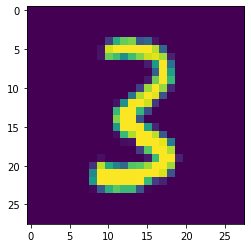

In [ ]:
plt.imshow(xb[0].view(28,28))
yb[0]

In [ ]:
model,opt = get_model()

In [ ]:
def fit():
    for epoch in range(epochs):
        for xb,yb in train_dl:
            pred = model(xb)
            loss = loss_func(pred, yb.long())
            loss.backward()
            opt.step()
            opt.zero_grad()

In [ ]:
fit()

In [ ]:
loss,acc = loss_func(model(xb), yb.long()), accuracy(model(xb), yb)
assert acc>0.7
loss,acc

(tensor(0.0277, grad_fn=<NllLossBackward>), tensor(1.))

### Random sampling

We want our training set to be in a random order, and that order should differ each iteration. But the validation set shouldn't be randomized.

[Jump_to lesson 9 video](https://course.fast.ai/videos/?lesson=9&t=3942)

In [ ]:
class Sampler():
    def __init__(self, ds, bs, shuffle=False):
        self.n,self.bs,self.shuffle = len(ds),bs,shuffle
        
    def __iter__(self):
        self.idxs = torch.randperm(self.n) if self.shuffle else torch.arange(self.n)
        for i in range(0, self.n, self.bs): yield self.idxs[i:i+self.bs]

In [ ]:
small_ds = Dataset(*train_ds[:10])

In [ ]:
s = Sampler(small_ds,3,False)
[o for o in s]

[tensor([0, 1, 2]), tensor([3, 4, 5]), tensor([6, 7, 8]), tensor([9])]

In [ ]:
s = Sampler(small_ds,3,True)
[o for o in s]

[tensor([2, 5, 1]), tensor([3, 0, 6]), tensor([7, 8, 4]), tensor([9])]

In [ ]:
def collate(b):
    xs,ys = zip(*b)
    return torch.stack(xs),torch.stack(ys)

class DataLoader():
    def __init__(self, ds, sampler, collate_fn=collate):
        self.ds,self.sampler,self.collate_fn = ds,sampler,collate_fn
        
    def __iter__(self):
        for s in self.sampler: yield self.collate_fn([self.ds[i] for i in s])

In [ ]:
train_samp = Sampler(train_ds, bs, shuffle=True)
valid_samp = Sampler(valid_ds, bs, shuffle=False)

In [ ]:
train_dl = DataLoader(train_ds, sampler=train_samp, collate_fn=collate)
valid_dl = DataLoader(valid_ds, sampler=valid_samp, collate_fn=collate)

tensor(3.)

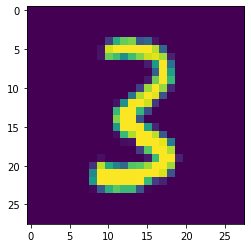

In [ ]:
xb,yb = next(iter(valid_dl))
plt.imshow(xb[0].view(28,28))
yb[0]

tensor(4.)

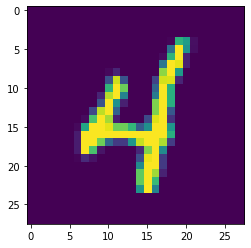

In [ ]:
xb,yb = next(iter(train_dl))
plt.imshow(xb[0].view(28,28))
yb[0]

tensor(9.)

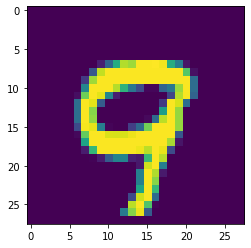

In [ ]:
xb,yb = next(iter(train_dl))
plt.imshow(xb[0].view(28,28))
yb[0]

In [ ]:
model,opt = get_model()
fit()

loss,acc = loss_func(model(xb), yb), accuracy(model(xb), yb)
assert acc>0.7
loss,acc

RuntimeError: ignored

### PyTorch DataLoader

[Jump_to lesson 9 video](https://course.fast.ai/videos/?lesson=9&t=4171)

In [ ]:
#export
from torch.utils.data import DataLoader, SequentialSampler, RandomSampler

In [ ]:
train_dl = DataLoader(train_ds, bs, sampler=RandomSampler(train_ds), collate_fn=collate)
valid_dl = DataLoader(valid_ds, bs, sampler=SequentialSampler(valid_ds), collate_fn=collate)

In [ ]:
model,opt = get_model()
fit()
loss_func(model(xb), yb), accuracy(model(xb), yb)

PyTorch's defaults work fine for most things however:

In [ ]:
train_dl = DataLoader(train_ds, bs, shuffle=True, drop_last=True)
valid_dl = DataLoader(valid_ds, bs, shuffle=False)

In [ ]:
model,opt = get_model()
fit()

loss,acc = loss_func(model(xb), yb), accuracy(model(xb), yb)
assert acc>0.7
loss,acc

Note that PyTorch's `DataLoader`, if you pass `num_workers`, will use multiple threads to call your `Dataset`.

## Validation

You **always** should also have a [validation set](http://www.fast.ai/2017/11/13/validation-sets/), in order to identify if you are overfitting.

We will calculate and print the validation loss at the end of each epoch.

(Note that we always call `model.train()` before training, and `model.eval()` before inference, because these are used by layers such as `nn.BatchNorm2d` and `nn.Dropout` to ensure appropriate behaviour for these different phases.)

[Jump_to lesson 9 video](https://course.fast.ai/videos/?lesson=9&t=4260)

In [ ]:
def fit(epochs, model, loss_func, opt, train_dl, valid_dl):
    for epoch in range(epochs):
        # Handle batchnorm / dropout
        model.train()
#         print(model.training)
        for xb,yb in train_dl:
            loss = loss_func(model(xb), yb.long())
            loss.backward()
            opt.step()
            opt.zero_grad()

        model.eval()
#         print(model.training)
        with torch.no_grad():
            tot_loss,tot_acc = 0.,0.
            for xb,yb in valid_dl:
                pred = model(xb)
                tot_loss += loss_func(pred, yb.long())
                tot_acc  += accuracy (pred,yb)
        nv = len(valid_dl)
        print(epoch, tot_loss/nv, tot_acc/nv)
    return tot_loss/nv, tot_acc/nv

*Question*: Are these validation results correct if batch size varies?

`get_dls` returns dataloaders for the training and validation sets:

In [ ]:
#export
def get_dls(train_ds, valid_ds, bs, **kwargs):
    return (DataLoader(train_ds, batch_size=bs, shuffle=True, **kwargs),
            DataLoader(valid_ds, batch_size=bs*2, **kwargs))

Now, our whole process of obtaining the data loaders and fitting the model can be run in 3 lines of code:

In [ ]:
train_dl,valid_dl = get_dls(train_ds, valid_ds, bs)
model,opt = get_model()
loss,acc = fit(5, model, loss_func, opt, train_dl, valid_dl)

In [ ]:
assert acc>0.9

## Export

In [ ]:
!python notebook2script.py 03_minibatch_training.ipynb